In [36]:
#imports
from sklearn import tree
import pandas as pd
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
#import our train and test csv
train_path = os.path.join("Data/train.csv")
train_df = pd.read_csv(train_path)

test_path = os.path.join("Data/test.csv")
test_df = pd.read_csv(test_path)

In [3]:
#drop na in test_df
test_df = test_df.dropna()

In [4]:
#drop na in train_df
train_df = train_df.dropna()

In [5]:
#convert the satisfaction column to 1's and 0's in the train_df
train_df["satisfaction"].replace({"satisfied":1, "neutral or dissatisfied":0}, inplace=True)

In [6]:
#convert gender column to 1's and 0's in train_df
train_df["Gender"].replace({"Male":1, "Female":0}, inplace=True)

In [7]:
#convert customer type column to 1's and 0's in train_df
train_df["Customer Type"].replace({"Loyal Customer":1, "disloyal Customer":0}, inplace=True)

In [8]:
#convert travel type column to 1's and 0's in train_df
train_df["Type of Travel"].replace({"Business travel":1, "Personal Travel":0}, inplace=True)

In [9]:
#convert class type column to 2's 1's and 0's in train_df
train_df["Class"].replace({"Business":2, "Eco":1, "Eco Plus":0}, inplace=True)

In [10]:
#assign the X_train data
train_df = train_df.drop(columns=["Unnamed: 0", 'id'])

#assign the y_train data
y_train = np.array(train_df["satisfaction"]).reshape(-1,1)

In [11]:
#assign x_train values
X_train = train_df

In [12]:
#drop target variable from x train
X_train = X_train.drop(columns=["satisfaction"])

In [13]:
#convert the satisfaction column to 1's and 0's in test_df
test_df["satisfaction"].replace({"satisfied":1, "neutral or dissatisfied":0}, inplace=True)

In [14]:
#convert gender column to 1's and 0's in test_df
test_df["Gender"].replace({"Male":1, "Female":0}, inplace=True)

In [15]:
#convert customer type column to 1's and 0's in test_df
test_df["Customer Type"].replace({"Loyal Customer":1, "disloyal Customer":0}, inplace=True)

In [16]:
#convert travel type column to 1's and 0's in test_df
test_df["Type of Travel"].replace({"Business travel":1, "Personal Travel":0}, inplace=True)

In [17]:
#convert class type column to 2's 1's and 0's in test_df
test_df["Class"].replace({"Business":2, "Eco":1, "Eco Plus":0}, inplace=True)

In [18]:
#drop unneeded columns and reshape y_test variable
test_df = test_df.drop(columns=["Unnamed: 0", 'id'])

y_test = np.array(test_df["satisfaction"]).reshape(-1,1)

In [19]:
#assign x_test variables
X_test = test_df

In [20]:
#drop the target variable from the X_test variables
X_test = X_test.drop(columns=["satisfaction"])

In [21]:
#establish the feature names for random forest importance metrics
feature_names = X_test.columns

In [23]:
#create model using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, oob_score=True)
rf = rf.fit(X_train, y_train)


<ipython-input-23-1b0348547d61>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X_train, y_train)


In [24]:
# print(rf.oob_score_) for 10 estimators: .942
# print(rf.oob_score_) for 50 estimators: .960
# print(rf.oob_score_) for 100 estimators:.9611
# print(rf.oob_score_) for 200 estimators: .963
# print(rf.oob_score_) for 500 estimators: .963

In [25]:
#score the model at 200 estimators
rf.score(X_test, y_test)

0.9635422701116132

In [26]:
#print out the feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.16439556909101696, 'Online boarding'),
 (0.14481020487834362, 'Inflight wifi service'),
 (0.09827846041951174, 'Class'),
 (0.09691995398169324, 'Type of Travel'),
 (0.0590916420304839, 'Inflight entertainment'),
 (0.049057220505693964, 'Seat comfort'),
 (0.03975352610229026, 'Customer Type'),
 (0.03856129482092633, 'Leg room service'),
 (0.03821667508695001, 'Ease of Online booking'),
 (0.03785776527915776, 'Flight Distance'),
 (0.03292436547465314, 'Age'),
 (0.029973140327807728, 'On-board service'),
 (0.024883577037530698, 'Baggage handling'),
 (0.024033565813143646, 'Checkin service'),
 (0.023706121621514996, 'Cleanliness'),
 (0.02339434757729102, 'Inflight service'),
 (0.017973904305042275, 'Departure/Arrival time convenient'),
 (0.01676129983558317, 'Gate location'),
 (0.012197523075951995, 'Arrival Delay in Minutes'),
 (0.0117047986063132, 'Food and drink'),
 (0.01095720465153904, 'Departure Delay in Minutes'),
 (0.004547839477561286, 'Gender')]

In [27]:
#save model using pickle
filename = 'gcloud_app/random_forest.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
import matplotlib.pyplot as plt

# from collections import OrderedDict
# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

# print(__doc__)

# RANDOM_STATE = 123

# # Generate a binary classification dataset.
# X, y = make_classification(n_samples=500, n_features=25,
#                            n_clusters_per_class=1, n_informative=15,
#                            random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
# ensemble_clfs = [
#     ("RandomForestClassifier, max_features='sqrt'",
#         RandomForestClassifier(warm_start=True, oob_score=True,
#                                max_features="sqrt",
#                                random_state=RANDOM_STATE)),
#     ("RandomForestClassifier, max_features='log2'",
#         RandomForestClassifier(warm_start=True, max_features='log2',
#                                oob_score=True,
#                                random_state=RANDOM_STATE)),
#     ("RandomForestClassifier, max_features=None",
#         RandomForestClassifier(warm_start=True, max_features=None,
#                                oob_score=True,
#                                random_state=RANDOM_STATE))
# ]

# # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
# error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200

x_values = np.arange(min_estimators, max_estimators + 1, 1).tolist()
y_values = []

for i in range(min_estimators, max_estimators + 1):
    model = RandomForestClassifier(n_estimators=i, oob_score=True).fit(X_train, y_train)
    y_values.append(1-model.oob_score_)
    
    



In [28]:
#assign importances to variable
importances = rf.feature_importances_ 

In [29]:
#get standard deviation of importances
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [32]:
#convert importances to pandas series
forest_importances = pd.Series(importances, index=feature_names)

Text(0, 0.5, 'Mean Decrease in Impurity')

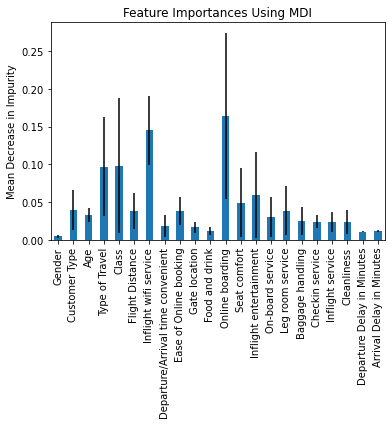

In [37]:
#plot feature importances and standard deviation as yerr bar
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances Using MDI")
ax.set_ylabel("Mean Decrease in Impurity")